# Reeb Graph Matching
#### Implementing 'Topology Matching for Fully Automatic Similarity Estimation of 3D Shapes'
#### http://graphics.stanford.edu/courses/cs468-08-fall/pdf/Hilaga01.pdf
#### (Hilaga et al., 2001)

In [1]:
import numpy as np
import os
from os.path import isfile, join
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csd_functions
import scipy
import networkx as nx
import reeb_matching
from copy import deepcopy
sns.set()


Load tree data

In [2]:
prefix = 'gbarEvPyrAmpa_sweep'

data_dir = os.path.abspath('../lfp_reeb_github/data')
name = 'gbarEvPyrAmpa_sweep10'
node_points, node_connectivity = reeb_matching.load_tree(data_dir,prefix,name)


Compute multiresoluion reeb graph

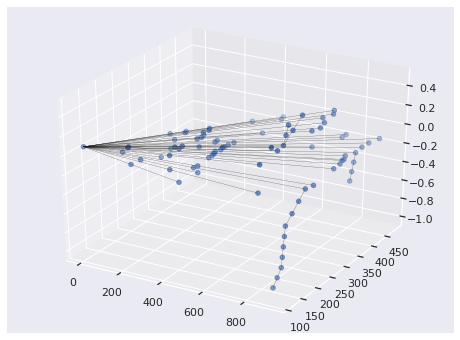

In [5]:
%matplotlib inline
G = nx.Graph()
G.add_edges_from(node_connectivity)

node_attributes = {node_id : {'Position' : node_points[node_id,:], 'Visited' : 0, 'Merged':[],'Inserted':[],'New_Merge':[]} for node_id in list(G.nodes)}
nx.set_node_attributes(G,node_attributes)

interval_dict = reeb_matching.compute_intervals(node_points, 16)

seed_node = list(G.nodes)[1]
reeb_matching.graph_search(G, seed_node, interval_dict,0)
reeb_matching.plot_graph(G)

G.clear()

Compute Similarity 

In [6]:
data_dir = os.path.abspath('../lfp_reeb_github/data')
prefix = 'gbarEvPyrAmpa_sweep'

s_dir = data_dir + '/' + prefix + '/' + 'skeleton/'
file_list = reeb_matching.get_skeleton_names(s_dir) # only first two for now

file_list

resolution_list = [16,8,4,2]

similarity_matrix, MPAIR_list = reeb_matching.tree_sim_matrix(file_list, resolution_list, data_dir, prefix)


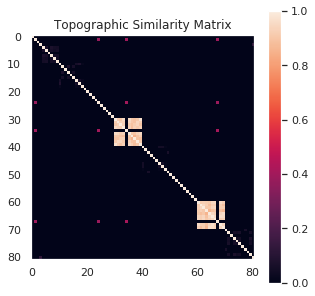

In [7]:
plt.figure(figsize=(5,5))
sns.set_style('darkgrid',{'axes.grid' : False})
plt.imshow(similarity_matrix,vmin=0, vmax=1)
plt.title('Topographic Similarity Matrix')
plt.colorbar()
plt.show()

Compare with wasserstein:

In [2]:
data_dir = '/home/ntolley/Jones_Lab/reeb_matching_local/lfp_reeb_github/data/gbarEvPyrAmpa_sweep/points'
file_list = os.listdir(data_dir)

w_similarity_matrix = reeb_matching.wasserstein_sim_matrix(file_list, data_dir,[])

KeyboardInterrupt: 

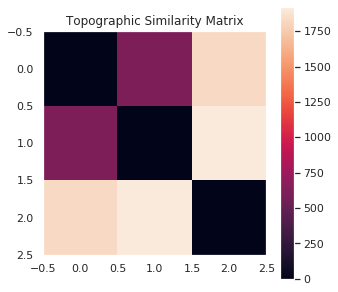

In [11]:
%matplotlib inline
plt.figure(figsize=(5,5))
sns.set_style('darkgrid',{'axes.grid' : False})
plt.imshow(w_similarity_matrix)
plt.title('Topographic Similarity Matrix')
plt.colorbar()
plt.show()

In [10]:
import scipy.spatial.distance as ssd
distVec = ssd.squareform(w_similarity_matrix)
linkage = hcluster.linkage(1 - distVec)
dendro  = hcluster.dendrogram(linkage)
show()

ValueError: Distance matrix 'X' must be symmetric.